# Parse the CSV File

In [4]:
# Display rows with invalid or inconsistent date formats
print(df["Date/Time"].unique())

<DatetimeArray>
[                'NaT', '2023-06-15 09:23:14', '2023-06-15 11:45:32',
 '2023-06-15 14:10:22', '2023-06-15 17:35:11', '2023-06-16 08:50:59',
 '2023-06-16 10:15:27', '2023-06-16 13:40:18', '2023-06-16 16:05:36',
 '2023-07-02 09:12:34', '2023-07-02 10:45:21', '2023-07-02 12:34:56',
 '2023-07-02 15:21:43', '2023-07-02 18:01:23', '2023-07-02 20:45:37',
 '2023-07-03 09:17:52', '2023-07-03 11:59:18', '2023-07-03 14:40:05',
 '2023-07-03 17:25:09', '2023-07-03 20:15:33', '2023-07-04 08:32:41',
 '2023-07-04 14:05:27', '2023-07-04 16:35:19', '2023-07-04 19:18:53',
 '2023-07-04 21:52:41', '2023-07-05 09:10:15', '2023-07-05 12:30:08',
 '2023-07-05 15:45:32', '2023-07-05 18:20:17', '2023-07-05 21:05:44',
 '2023-07-06 08:48:39', '2023-07-06 11:25:56', '2023-07-06 14:15:23',
 '2023-07-06 17:02:11', '2023-07-09 09:12:54', '2023-07-09 11:45:32',
 '2023-07-09 14:23:18', '2023-07-09 17:05:46', '2023-07-09 19:40:27',
 '2023-07-10 08:50:13', '2023-07-10 11:32:59', '2023-07-10 14:20:05',
 '20

In [5]:
# Parse dates explicitly using a consistent format
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [7]:
import pandas as pd

# Read the CSV file as a single column
file_path = "sentiment-analysis.csv" 
raw_df = pd.read_csv(file_path, header=None, names=["raw_data"])

# Split the single column into multiple columns
columns = ["Text", "Sentiment", "Source", "Date/Time", "User ID", "Location", "Confidence Score"]
df = raw_df["raw_data"].str.split(",", expand=True)
df.columns = columns

# Strip any extra whitespace from the columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert Date/Time column to datetime
df["Date/Time"] = pd.to_datetime(df["Date/Time"], errors="coerce")

# Convert Confidence Score to numeric
df["Confidence Score"] = pd.to_numeric(df["Confidence Score"], errors="coerce")

# Save the parsed data to a new CSV for verification
df.to_csv("parsed_sentiment_data.csv", index=False)


/var/folders/q_/2tddcp750xn1_gjdp47qjfp40000gn/T/ipykernel_72235/1046409255.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date/Time"] = pd.to_datetime(df["Date/Time"], errors="coerce")


# Data Cleaning

In [12]:
import pandas as pd
import numpy as np


df = pd.read_csv("parsed_sentiment_data.csv")

# Handle missing values
df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save cleaned data
df.to_csv("cleaned_sentiment_data.csv", index=False)

# Sentiment analysis

In [14]:
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.8 MB/s eta 0:00:00a 0:00:01


In [17]:
from textblob import TextBlob

# Validate sentiment labels
df["calculated_sentiment"] = df["Text"].apply(
    lambda x: "Positive" if TextBlob(x).sentiment.polarity > 0 else "Negative"
)

# Checking consistency between provided and calculated sentiment
df["label_match"] = df["Sentiment"] == df["calculated_sentiment"]

# Save validated data
df.to_csv("validated_sentiment_data.csv", index=False)

In [18]:
text = "I love this product! It's amazing."
blob = TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=0.6125, subjectivity=0.75)


# Statistical Analysis

In [21]:
# Convert the 'Date/Time' column to datetime format
df["Date/Time"] = pd.to_datetime(df["Date/Time"], errors="coerce")

# Check if there are any invalid dates
print(df["Date/Time"].isna().sum())  # Count rows with invalid dates

# Drop rows with invalid datetime values, if necessary
df.dropna(subset=["Date/Time"], inplace=True)

0


In [24]:
# Sentiment distribution
sentiment_counts = df["Sentiment"].value_counts()

# Temporal trends
df["Year/Month"] = df["Date/Time"].dt.to_period("M")  # Group by Year/Month
temporal_trends = df.groupby("Year/Month")["Sentiment"].value_counts(normalize=True).unstack()

# Source analysis
source_analysis = df["Source"].value_counts()

# Display results
print(sentiment_counts)
print(temporal_trends)
print(source_analysis)

Sentiment
Positive    42
Negative    33
Name: count, dtype: int64
Sentiment   Negative  Positive
Year/Month                    
2023-06     0.375000  0.625000
2023-07     0.447761  0.552239
Source
Online Store           10
Spotify                 6
Zomato                  5
Website Review          5
Goodreads               5
IMDb                    4
TripAdvisor             4
Online Chat             4
Yelp Reviews            4
Music Review            3
Theme Park Review       3
Event Review            3
Website Testimonial     3
Retail Store            2
Online Helpdesk         2
Food Blog               1
Travel Website          1
Hotel Review            1
TV Show Review          1
Art Review              1
Twitter                 1
Gaming Forum            1
Airline Review          1
Trip Report             1
Amazon Reviews          1
Online Forum            1
Travel Blog             1
Name: count, dtype: int64


In [23]:
print(df["Date/Time"].dtype)  

datetime64[ns]


# Data Visualization

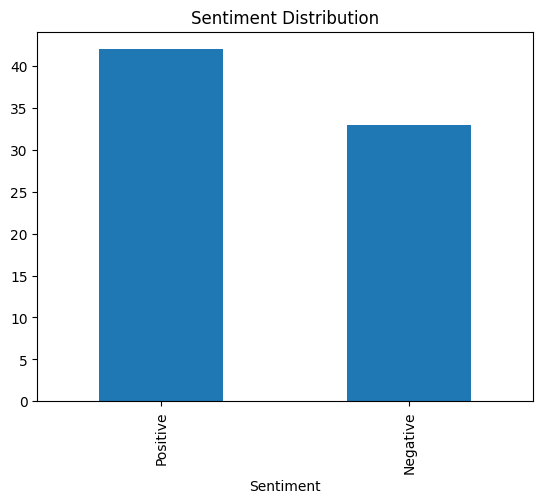

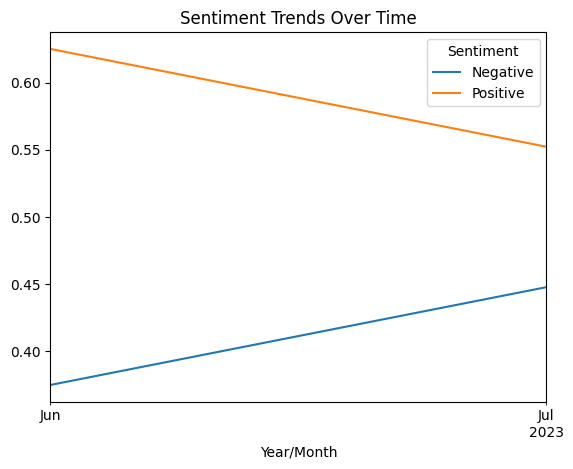

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sentiment_counts.plot(kind="bar", title="Sentiment Distribution")
plt.show()

# Temporal trends
temporal_trends.plot(title="Sentiment Trends Over Time")
plt.show()

# Text Pre-processing

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["cleaned_text"] = df["Text"].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasibullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasibullah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasibullah/nltk_data...


# Topic Modelling

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the cleaned text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
dtm = vectorizer.fit_transform(df["cleaned_text"])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Print topics
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])


Topic 0:
['highly', 'poor', 'im', 'movie', 'damaged', 'book', 'quality', 'disappointed', 'song', 'product']
Topic 1:
['thrilling', 'technical', 'park', 'theme', 'resolution', 'support', 'ride', 'coaster', 'roller', 'experience']
Topic 2:
['slow', 'wait', 'delicious', 'best', 'food', 'band', 'amazing', 'website', 'concert', 'absolutely']
Topic 3:
['experience', 'book', 'finish', 'userfriendly', 'rude', 'staff', 'unprofessional', 'service', 'terrible', 'website']
Topic 4:
['ordered', 'store', 'disappointed', 'support', 'terrible', 'food', 'restaurant', 'im', 'service', 'customer']


# Feature Engineering

In [28]:
# Add additional features
df["text_length"] = df["Text"].apply(len)
df["word_count"] = df["Text"].apply(lambda x: len(x.split()))
df["sentiment_score"] = df["Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Machine Learning Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Feature extraction
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["cleaned_text"])
y = df["Sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.83      0.83      0.83         6
    Positive       0.89      0.89      0.89         9

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15



# Data Aggregation

In [30]:
# Aggregate data by location
location_sentiments = df.groupby("Location")["Sentiment"].value_counts(normalize=True)

# Aggregate data by date
date_sentiments = df.groupby("Date/Time")["Sentiment"].value_counts(normalize=True)

# Final Format for LLM

In [31]:
# Save cleaned text for pretraining
df["cleaned_text"].to_csv("pretrain_corpus.txt", index=False, header=False)